# House Price Prediction

### Import libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load dataset

In [2]:
data=pd.read_csv("Housing.csv")

### Preprocessing

In [3]:
data

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
 4   stories    545 non-null    int64
 5   parking    545 non-null    int64
dtypes: int64(6)
memory usage: 25.7 KB


In [5]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Training data


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
X=data[['area','bedrooms','bathrooms','stories','parking']]
y=data['price']

### Splitting the data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

### Training the model

In [9]:
reg = LinearRegression()

In [10]:
reg.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = reg.predict(X_test)

In [12]:
y_pred

array([7574511.84963309, 6290020.07507541, 7521301.00127655,
       3139365.04962327, 5652804.56307944, 4035350.40011186,
       6002634.55122017, 3017690.8163223 , 5177333.3528498 ,
       3346144.68732419, 7590589.34556523, 3857233.31104692,
       3583554.3787957 , 3328120.70869456, 6685820.64161457,
       2566463.81811072, 4313521.13963577, 6399491.64797589,
       4630371.19211492, 3115038.03342316, 4009277.16229759,
       4137371.55570544, 3421514.78566291, 4122441.43950971,
       3236673.1144237 , 3045970.97265493, 3569262.25677814,
       6186630.25622495, 3240587.10225579, 4399264.53821389,
       3711049.93032581, 6625003.1011143 , 6393481.02474502,
       3781211.38542158, 6384287.26285083, 3583554.3787957 ,
       4528085.10111925, 5278352.26737213, 4475404.45793174,
       3401101.75729489, 5968196.30870285, 3920596.17612241,
       6336771.61102464, 4245596.95902276, 6000641.20524933,
       4818684.2841453 , 3374385.69135639, 7292721.52654047,
       5803857.30943053,

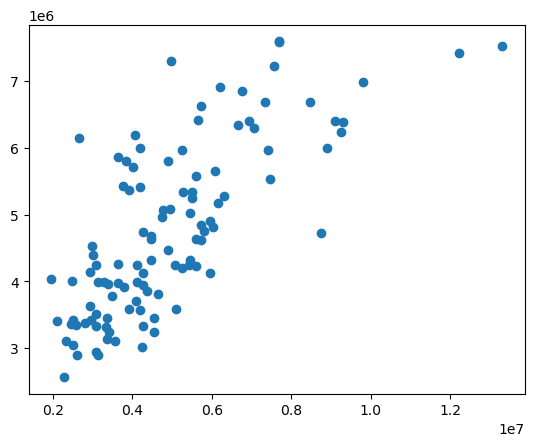

In [13]:
plt.scatter(y_test,y_pred)

In [14]:
from sklearn import metrics

#### MAE

In [15]:
metrics.mean_absolute_error(y_test,y_pred)

1022587.329709853

#### MSE

In [16]:
metrics.mean_squared_error(y_test, y_pred)

2037689969878.0154

#### RMSE

In [17]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1427476.784356935

### Predicting House Price For New Data Values

In [ ]:
# Function to take user input for new data point and predict house price
def predict_house_price():
    area = float(input("Enter the area of the house (in square feet): "))
    bedrooms = int(input("Enter the number of bedrooms: "))
    bathrooms = float(input("Enter the number of bathrooms: "))
    stories = int(input("Enter the number of stories: "))
    parking = int(input("Enter the number of parking spaces: "))

    # Create a new data point
    new_data = pd.DataFrame({
        'area': [area],
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'stories': [stories],
        'parking': [parking]
    })

    # Predict the price using the trained model
    predicted_price = reg.predict(new_data)[0]

    print("Predicted price of the house:", predicted_price)

# Call the function to get user input and predict the price
predict_house_price()


Enter the area of the house (in square feet): 4500
Enter the number of bedrooms: 3
Enter the number of bathrooms: 4
Enter the number of stories: 2
